### 군집화
- 비지도학습으로 정답없이, 특징만 가지고 있는 데이터로 모델을 구현

### 문제정의 
: 키와 몸무게로 학생들을 3그룹으로 분류

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
df = pd.read_csv('../Data/student_kmeans.csv')
df.head()

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68


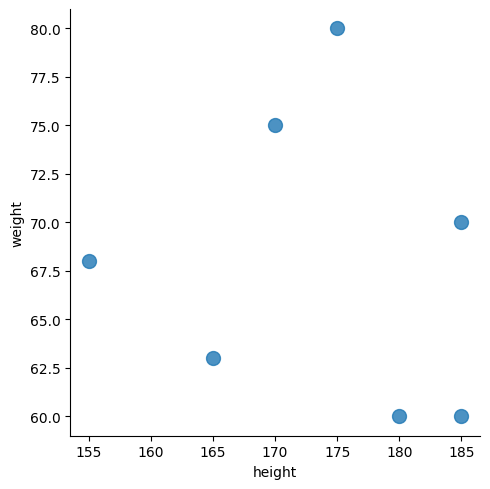

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(
    x='height',
    y='weight',
    data=df,
    fit_reg=False,
    scatter_kws={'s':100}
)

---
### clustering 하기

In [14]:
from sklearn.cluster import KMeans
data_points = df.values
kmeans = KMeans(n_clusters=4).fit(data_points)

/Users/kwonsoonhyong/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
# 각 군집의 중심위치
kmeans.cluster_centers_

array([[182.5,  60. ,   1. ],
       [172.5,  77.5,   0. ],
       [160. ,  65.5,   2. ],
       [185. ,  70. ,   1. ]])

In [16]:
# 각 군집의 라벨
kmeans.labels_

array([0, 0, 3, 2, 2, 1, 1], dtype=int32)

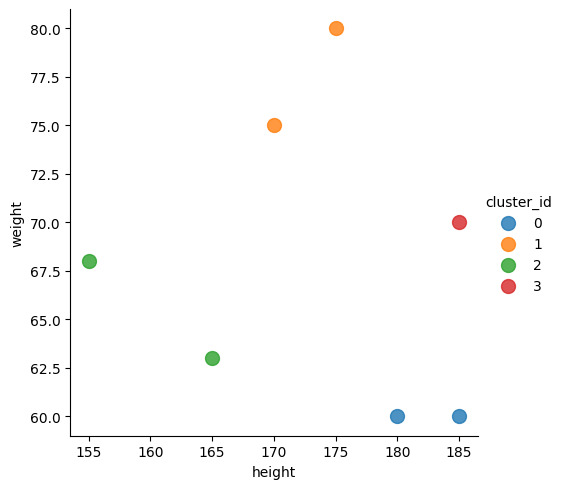

In [17]:
# 데이터가 어느 군집에 소속되어 있는지 정하기
df['cluster_id'] = kmeans.labels_
df.head()

sns.lmplot(
    x='height',
    y='weight',
    data=df,
    fit_reg=False,
    hue='cluster_id',
    scatter_kws={'s':100}
)

---
### iris

In [18]:
iris = pd.read_csv('../Data/iris.csv')

In [19]:
iris['label'] = iris['Name'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [20]:
# clustering 하기
iris2 = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
data_points = iris2.values
kmeans = KMeans(n_clusters=3).fit(data_points)

/Users/kwonsoonhyong/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
iris['kmeans'] = kmeans.labels_
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,kmeans
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0


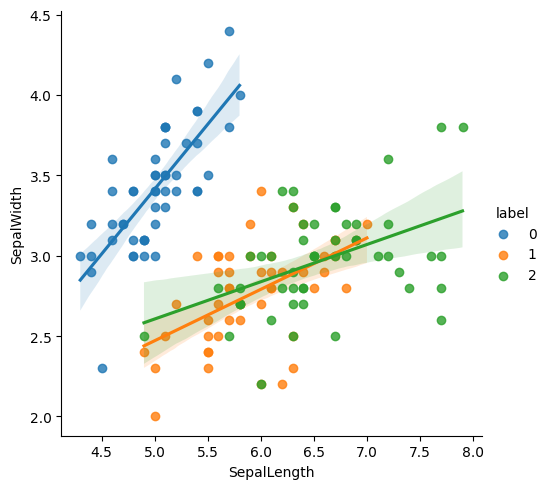

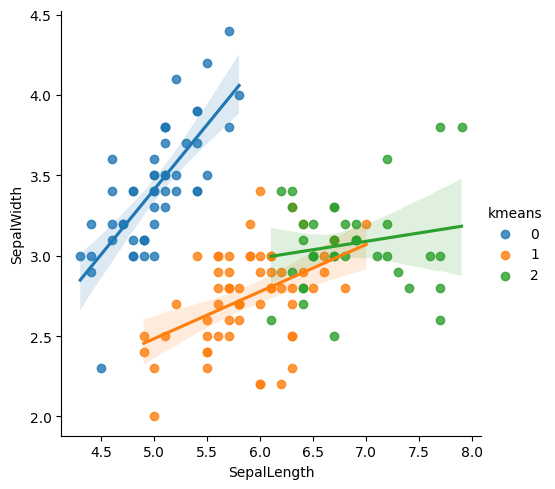

In [23]:
sns.lmplot(
    x='SepalLength',
    y='SepalWidth',
    data=iris,
    hue='label'
)

sns.lmplot(
    x='SepalLength',
    y='SepalWidth',
    data=iris,
    hue='kmeans'
)

In [30]:
# 군집화 했을 때와 iris label 맞추기 확률
import numpy as np
np.mean(iris.label == iris.kmeans) * 100

89.33333333333333

In [32]:
# 정확도 측정 다른 방법
from sklearn.metrics import accuracy_score
accuracy_score(iris.label,iris.kmeans)

0.8933333333333333